# <center> **Build a Decision Tree Model**

### **1. Introduction & overview**

- In this activity, we’ll build a **`decision tree model`** that makes predictions for a target based on multiple features. 
- For this activity, we work as a **`consultant for an airline`**. 
- The airline is interested in predicting whether a customer would be satisfied with their services given previous customer feedback. 
- The airline would like you to construct and evaluate a model that can accomplish this goal. 
- Specifically, **`they are interested in knowing which features are most important to customer satisfaction`**.
- The data for this activity includes survey responses from **`129,880 customers`**. 
- It includes data points such as class, flight distance, and in-flight entertainment, among others. 
- In a previous activity, we utilized a **`binomial logistic regression model`** to help the airline better understand this data. 
- In this activity, our goal will be to utilize a **`decision tree model`** to predict whether or not a customer will be satisfied with their flight experience. 
- The dataset comes from the industry, we will need to conduct basic EDA, data cleaning, and other manipulations to prepare the data for modeling.
- In this activity, we’ll practice the following skills:
    * Importing packages and loading data
    * Exploring the data and completing the cleaning process
    * Building a decision tree model
    * Tuning hyperparameters using `GridSearchCV`
    * Evaluating a decision tree model using a confusion matrix and various other plots

### **2. Imports**

- Import relevant Python packages. 
- Use **`DecisionTreeClassifier`**,**` plot_tree`**, and various imports from **`sklearn.metrics`** to build, visualize, and evaluate the model.
- Import the dataset

In [23]:
# Standard operational package imports
import numpy as np
import pandas as pd

# Important imports for modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import sklearn.metrics as metrics

# Visualization package imports
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Import the dataset
file =r"C:\Users\barba\OneDrive\Documents\AIO Python\Datasets\Invistico_Airline.csv" # Airline_dataset on github
invistico = pd.read_csv(file)

In [25]:
invistico.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


### **3. Data exploration, data cleaning, and model preparation**

#### **3.1. Prepare the data**

- After loading the dataset, prepare the data to be suitable for decision tree classifiers. This includes: 
    *   Exploring the data
    *   Checking for missing values
    *   Encoding the data
    *   Renaming a column
    *   Creating the training and testing data

#### **3.2. Explore the data**

In [26]:
# check data types : 
invistico.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

#### **3.3. Output unique values**
- The **`Class`** column is ordinal (meaning there is an inherent order that is significant). 
- For example, airlines typically charge more for 'Business' than 'Eco Plus' and 'Eco'. 
- Output the unique values in the **`Class`** column. 

In [11]:
# Check unique values of categorical data : 
print(invistico["Class"].unique())
print(invistico["Customer Type"].unique())
print(invistico["Type of Travel"].unique())

['Eco' 'Business' 'Eco Plus']
['Loyal Customer' 'disloyal Customer']
['Personal Travel' 'Business travel']


#### **3.4. Check the counts of the predicted labels**

- In order to predict customer satisfaction, verify if the dataset is imbalanced. 
- To do this, check the counts of each of the predicted labels. 

In [27]:
# Set the `dropna` parameter passed in to this function to `False` if we want to examine how many NaN values there are. 
invistico['satisfaction'].value_counts(dropna = False, normalize = True).round(4) *100

satisfaction
satisfied       54.73
dissatisfied    45.27
Name: proportion, dtype: float64

* **`54.7%`** of customers were satisfied. 
* This value can be compared to a decision tree's model accuracy. 
* **`45.3%`** of customers were dissatisfied

#### **3.5. Check for missing values**

- The sklearn decision tree implementation does not support missing values. 
- Check for missing values in the rows of the data. 

In [28]:
# percentage of missing values in each column: 
invistico.isnull().sum()/len(invistico) * 100


satisfaction                         0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Seat comfort                         0.000000
Departure/Arrival time convenient    0.000000
Food and drink                       0.000000
Gate location                        0.000000
Inflight wifi service                0.000000
Inflight entertainment               0.000000
Online support                       0.000000
Ease of Online booking               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Cleanliness                          0.000000
Online boarding                      0.000000
Departure Delay in Minutes           0.000000
Arrival Delay in Minutes          

- This is an important check because if there are only a small number of missing values, those rows can be safely removed.
- However, if the number of missing values is significant, it may be necessary to drop entire columns.
- In our case, we can removes rows with missing values.

#### **3.6. Check the number of rows and columns in the dataset**

In [19]:
invistico.shape

(129880, 22)

#### **3.7. Drop the rows with missing values**

In [ ]:
invistico.dropna(inplace=True, axis=0)
invistico.reset_index(drop=True)

### **3.8. Check the number of rows and columns in the dataset again** 

In [35]:
invistico.shape

(129487, 22)

### **3.9. Encode the data**

* Four columns (**`satisfaction`, `Customer Type`, `Type of Travel`, `Class`**) are the pandas dtype object. 
* **`Decision trees need numeric columns`**. 
* Start by converting the ordinal **`Class`** column into numeric. 

In [36]:
invistico['Class'] = invistico['Class'].map({"Business": 3, "Eco Plus": 2, "Eco": 1}) 

- For the target variable : **`satisfaction`** column: 
    - assign **`"satisfied"`** to the label **`1`** 
    - **`"dissatisfied"`** to the label **`0`** in the . 

In [37]:
invistico['satisfaction'] = invistico['satisfaction'].map({"satisfied": 1, "dissatisfied": 0})

#### **3.10. Convert other categorical columns into numeric**

In [46]:
invistico = pd.get_dummies(invistico, drop_first = True)
print(invistico.columns)
print(invistico.dtypes)

Index(['satisfaction', 'Age', 'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Customer Type_disloyal Customer', 'Type of Travel_Personal Travel'],
      dtype='object')
satisfaction                           int64
Age                                    int64
Class                                  int64
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Onli

### **3.11. Create the training and testing data**
- We'll put 75% of the data into a **`training set`** and the remaining 25% into a **`testing set`**. 
- We'll use the **`stratify=y`** argument to fix the ratio of 0 and 1 in the train and test sets 
- **`Random state = 0`** to reproduce the results

In [47]:
y = invistico["satisfaction"]

X = invistico.copy()
X = X.drop("satisfaction", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

## **4. Model building**

#### **4.1. Fit a decision tree classifier model to the data**
- We make a decision tree instance called **`decision_tree`** and pass in **`0`** to the **`random_state`** parameter. 
- This is only so that if other data professionals run this code, they get the same results. 
- We fit the model on the training set, use the **`predict()`** function on the testing set, and assign those predictions to the variable **`dt_pred`**. 

In [49]:
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)
dt_pred = decision_tree.predict(X_test)

* Decision trees require no assumptions regarding the distribution of underlying data and don't require scaling of features. 
* We use decision trees because there is no need for additional data processing, unlike some other models. 

## **5. Results and evaluation**

In [57]:
print("Decision Tree")
print("Accuracy:", "%.6f" % metrics.accuracy_score(y_test, dt_pred))
print("Precision:", "%.6f" % metrics.precision_score(y_test, dt_pred))
print("Recall:", "%.6f" % metrics.recall_score(y_test, dt_pred))
print("F1 Score:", "%.6f" % metrics.f1_score(y_test, dt_pred))

Decision Tree
Accuracy: 0.933399
Precision: 0.936557
Recall: 0.942159
F1 Score: 0.939350


#### **5.1. Be cautious**
- Decision trees can be particularly susceptible to overfitting. 
- Combining **`hyperparameter tuning`** and **`grid search`** can help ensure this doesn't happen. 
- For instance, setting an appropriate value for **`max depth`** could potentially help reduce a **`decision tree's overfitting`**  
problem by limiting how deep a tree can grow. 

#### **5.2. Produce a confusion matrix**

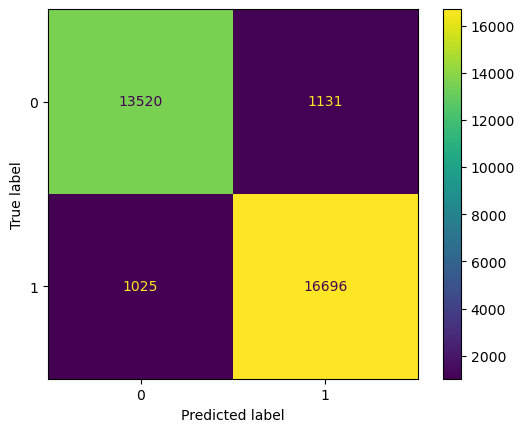

In [61]:
cm = metrics.confusion_matrix(y_test, dt_pred, labels = decision_tree.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = decision_tree.classes_)
disp.plot();

- In the confusion matrix, there are a **`high proportion`** of **`true positives`** and **`true negatives`**  
(where the matrix accurately predicted that the customer would be satisfied or dissatified, respectively). 
- The matrix also had a relatively **`low number`** of **`false positives`** and **`false negatives`**  
(where the matrix innacurately predicted that the customer would be satisfied or dissatified, respectively.) 

#### **5.3. Plot the decision tree**

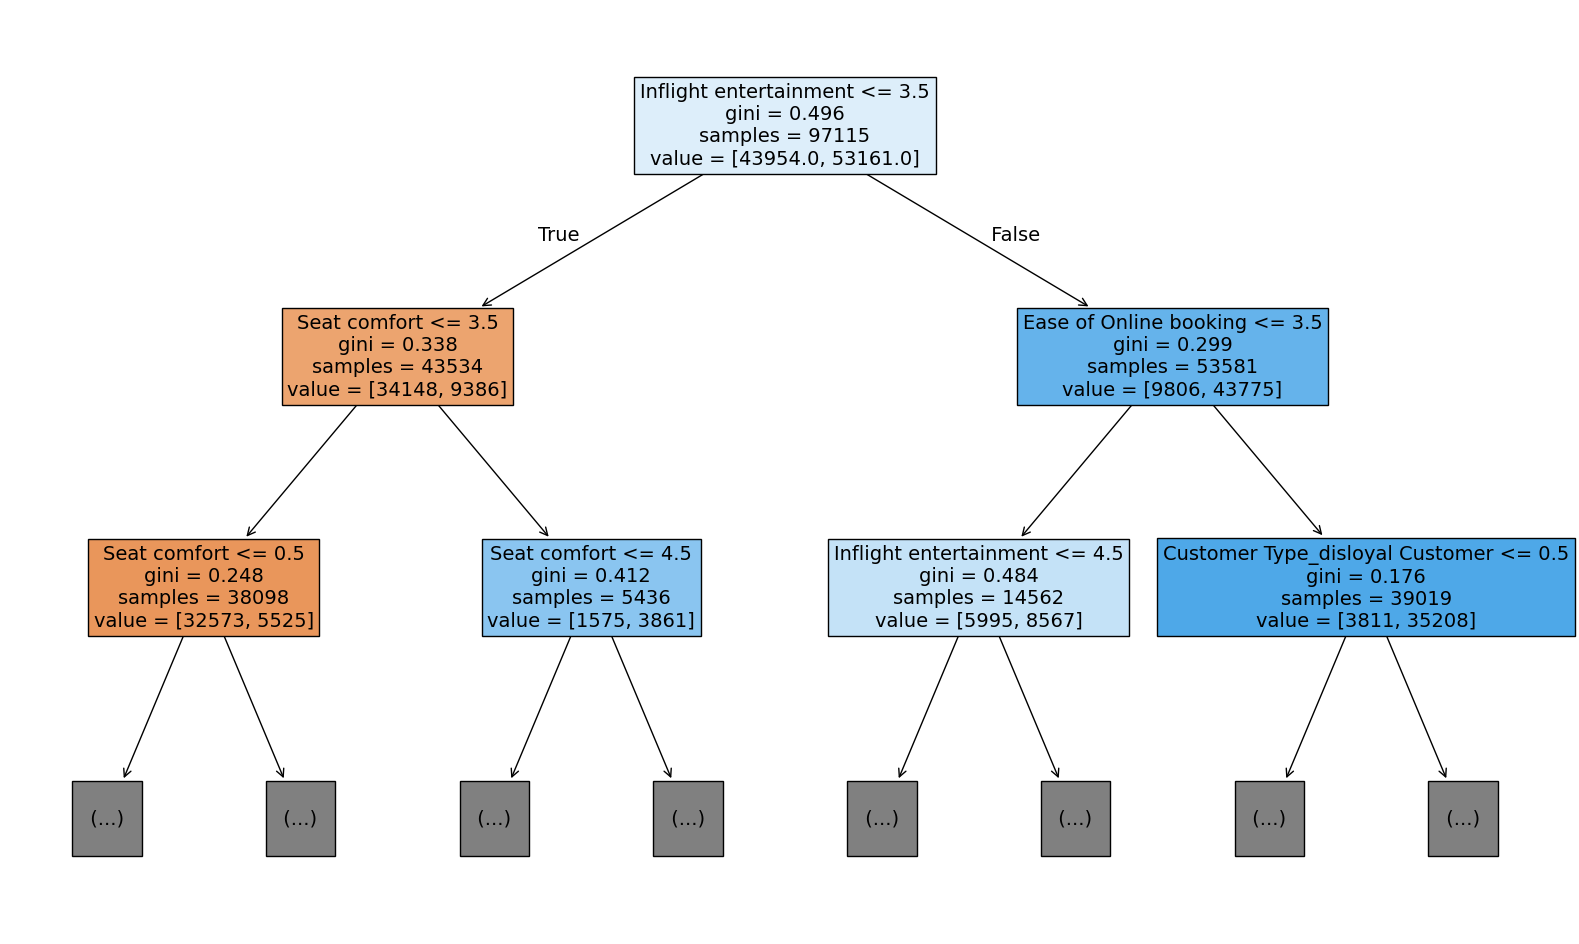

In [62]:
plt.figure(figsize=(20,12))
plot_tree(decision_tree, max_depth=2, fontsize=14, filled=True, feature_names=X.columns);

#### **5.4. Calculate feature importance**

- The **`DecisionTreeClassifier`** class comes with a [**`feature_importances_`**](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.feature_importances_) attribute that provides access to the features' relative importance in the model. 
- The feature importances are computed when the **`fit()`** method is called on the **`DecisionTreeClassifier`** instance. 
- In other words, it's information that is generated during model training. 
- Here's how it works.
    - For each feature used in the tree, the algorithm finds all of the decision nodes that use that particular feature as the split criterion. 
    - Then for each of those decision nodes it computes the decrease in **`Gini impurity`**  
    (or entropy, or log loss, or whatever metric you select when you fit the modeldefault is Gini impurity)  
    that results from that split (so, the decrease from parent to children). 
    - Then the algorithm sums up the decreases across all the decisions made using that feature and expresses it as a percentage of the total decrease that resulted from **_all_** features. 
- Here is a simple example of how you can calculate feature importance from a tree diagram. 
- This tree splits **`10 samples`** using two features, **X<sub>1</sub>** and **X<sub>2</sub>**:

<img src='./SR-003_build_a_decision_tree_graphic.png'/>

- Notice that the reduction in **`Gini impurity`** is weighted based on how many samples are in each node. 
- Ultimately, the reduction that results from each feature is normalized (i.e., expressed as a percentage),  
and this percentage represents the importance of a given feature.
- This can be interpreted as: **X<sub>1</sub>** is responsible for **`64.3%`** of the overall reduction of Gini impurity in the model,  
 and **X<sub>2</sub>** is responsible for **`35.7%`** of the overall reduction of Gini impurity in the model.
- Using the **`feature_importances_`** attribute to fetch the relative importances of each feature, you can then plot the results.

In [68]:
decision_tree.feature_importances_

array([0.02521624, 0.02294388, 0.03356705, 0.18016704, 0.02318022,
       0.01571344, 0.03151833, 0.00691322, 0.39255217, 0.02038945,
       0.06652361, 0.0093945 , 0.01884755, 0.01626798, 0.02011657,
       0.01653064, 0.01174987, 0.0105868 , 0.01302173, 0.0428402 ,
       0.0219595 ])

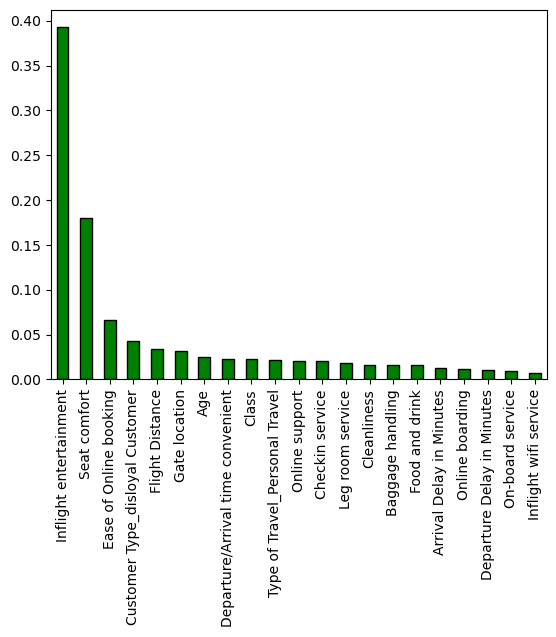

In [69]:
importances = decision_tree.feature_importances_
forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
forest_importances.plot.bar(color="green", edgecolor="black");

- The feature importance graph seems to confirm that:  
    - **`'Inflight entertainment'`**, 
    - **`'Seat comfort'`**, 
    - and **`'Ease of Online booking'`** are the most important features for this model. 

## **6. Hyperparameter tuning**

- In this section, we will find the best values for the hyperparameters **`max_depth`** and **`min_samples_leaf`** using **`grid search`** and **`cross validation`**. 
- Below are some values for the hyperparameters **`max_depth`** and **`min_samples_leaf`**.   

In [70]:
tree_para = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],
             'min_samples_leaf': [2,3,4,5,6,7,8,9, 10, 15, 20, 50, 100]}

scoring = {'accuracy': 'accuracy', 
           'precision': 'precision', 
           'recall': 'recall', 
           'f1': 'f1'}

#### **6.1. Check combinations of values**

- We check every combination of values to examine which pair has the best evaluation metrics. 
- We make a decision tree instance called **`tuned_decision_tree`** with **`random_state=0`**, 
- We make a **`GridSearchCV`** instance called **`clf`**, 
- We make sure to refit the estimator using **`"f1"`**, 
- We fit the model on the training set. 

**Note:** This cell may take up to 15 minutes to run.

In [71]:
# Fix: scoring should be a dict, not a set
tuned_decision_tree = DecisionTreeClassifier(random_state=0)
clf = GridSearchCV(tuned_decision_tree, 
                   tree_para, 
                   scoring = scoring, 
                   cv=5, 
                   refit="f1")

clf.fit(X_train, y_train)

c:\Users\barba\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 30, 40,
                                       50],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                              20, 50, 100]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

#### **6.2. Compute the best combination of values for the hyperparameters**

In [72]:
print(clf.best_estimator_)

DecisionTreeClassifier(max_depth=16, min_samples_leaf=2, random_state=0)


#### **6.3. Determine the best average validation score**

In [73]:
print("Best Avg. Validation Score: ", "%.4f" % clf.best_score_)

Best Avg. Validation Score:  0.9442


In [ ]:
df= pd.DataFrame(clf.cv_results_)
df['mean_test_f1'].max()

0.9442384636335286

#### **6.4. Determine the "best" decision tree model's accuracy, precision, recall, and F1 score**

In [75]:
results = pd.DataFrame(columns=['Model', 'F1', 'Recall', 'Precision', 'Accuracy'])

def make_results(model_name, model_object):
    """
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    """

    # Get all the results from the CV and put them in a df.
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score).
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row.
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

 
    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
                         }
                        )

    return table

result_table = make_results("Tuned Decision Tree", clf)

result_table

,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,0.944238,0.934426,0.95428,0.939587


- The **`F1 score`** for the **_decision tree that was not hyperparameter_** tuned is **`0.940940`**. 
- The **`F1 score`** for the **_hyperparameter-tuned decision tree_** is **`0.945422`**. 
- While ensuring that overfitting doesn't occur is necessary for some models, it didn't make a meaningful difference in improving this model. 

#### **6.5. Plot the "best" decision tree**

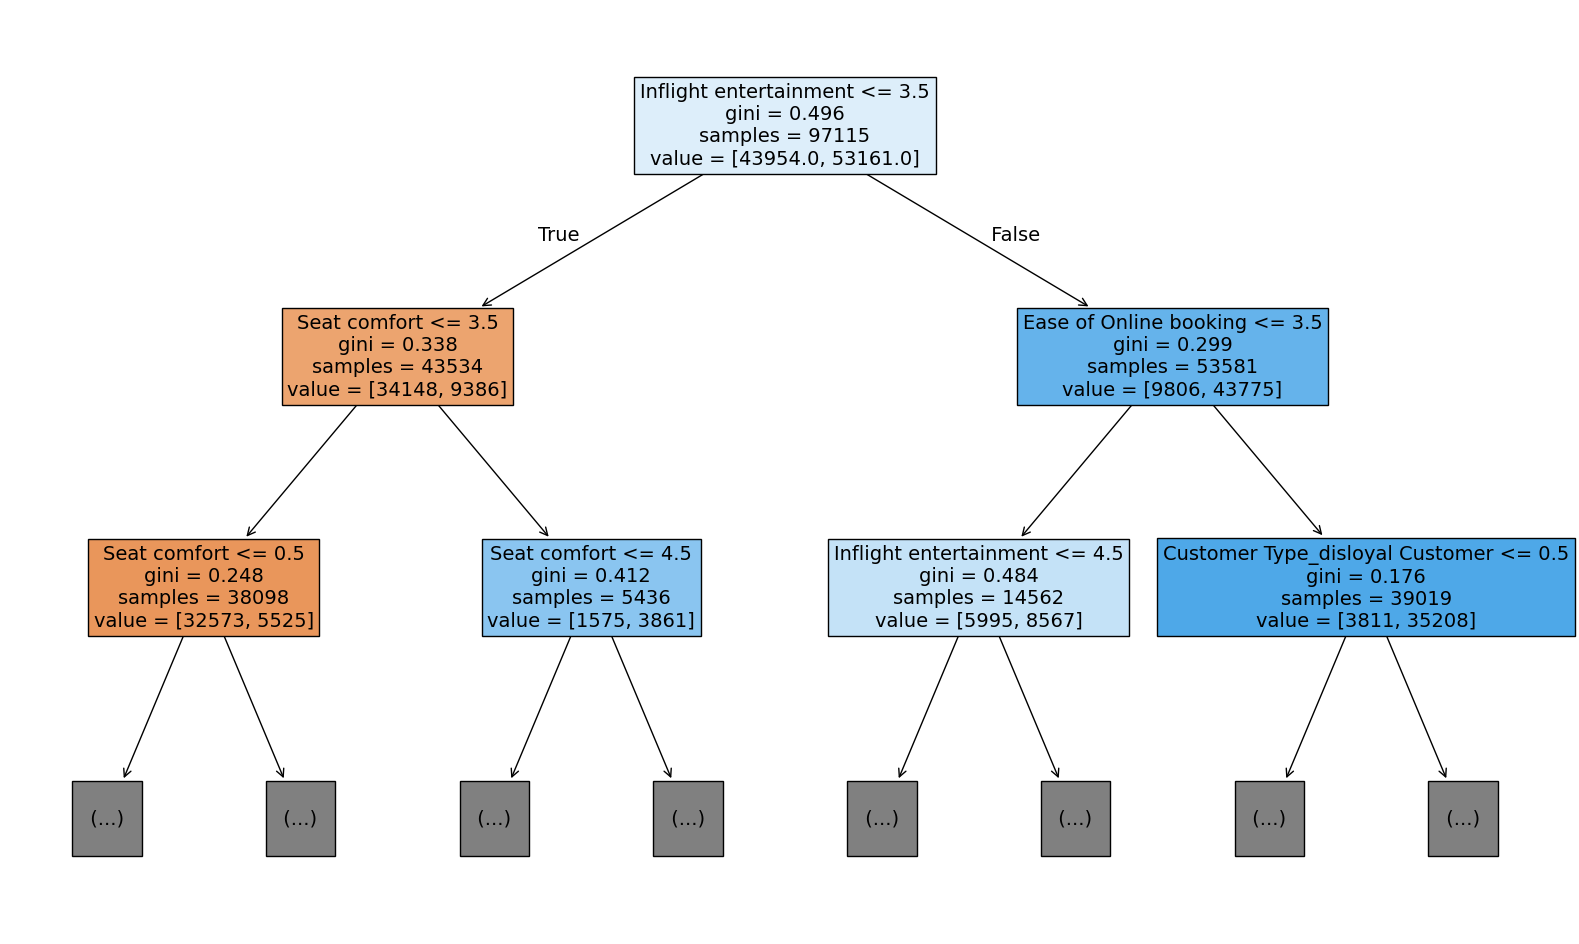

In [76]:
plt.figure(figsize=(20,12))
plot_tree(clf.best_estimator_, max_depth=2, fontsize=14, feature_names=X.columns, filled=True);

- The plot makes it seem like: 
- **`'Inflight entertainment'`**,
- **`'Seat comfort'`**, 
- **`'Ease of Online booking'`** are among the most important features. 
- The code below outputs a "most important" features graph from the model.

#### **6.6. Build another feature importance graph**

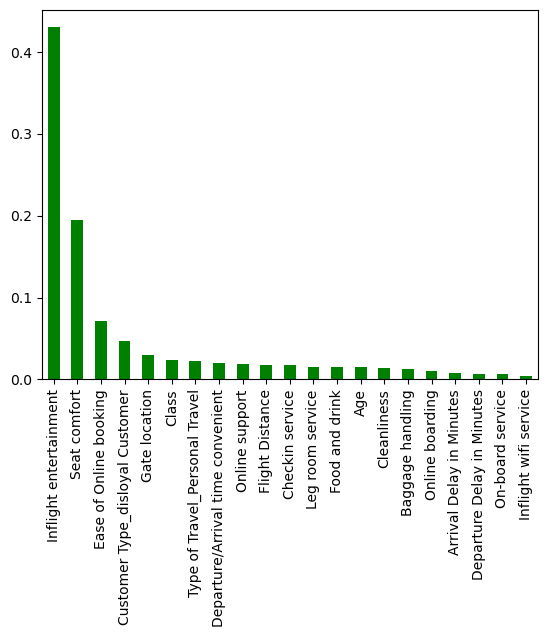

In [ ]:
importances = clf.best_estimator_.feature_importances_
forest_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
forest_importances.plot.bar(color='green');

**Question: What do you think is the most important metric in this business case?**

* Any of the metrics in this business case could be considered important, depending on what the stakeholder or domain expert cares about. 
* The following are reasons why each metric is important: 
    - **`Accuracy`** tends to be the metric that the stakeholders can best understand.
    - **`Precision`** measures what proportion of predicted positives is truly positive.  
    For example, if you wanted to not falsely claiming a customer is satisfied, precision would be a good metric.  
    Assuming a customer is happy when they are really not might lead to customer churn. 
    - **`Recall`** measures the percentage of actual positives a model correctly identified (true positive).  
    For this dataset, the airline might want to limit false negatives (actually satisfied people who are predicted to be unsatisfied).  
    Assuming a customer is unhappy when the customer is happy can lead to the airline wasting resources trying to improve  
    the customer experience of an already happy customer. 
    - **`F1`** balances precision and recall. It is the harmonic mean of precision and recall, or their product divided by their sum.

## **7. Considerations**

#### **7.1. Some key-takeaways :**
* Machine learning workflows may be used to clean and encode data for machine learning.
* While hyperparameter tuning can lead to an increase in performance, it doesn't always. 
* The visualization of the decision tree as well as the feature graph can be used to determine which features are most important for a decision tree.

#### **7.2. Findings to share with others :**
* Decision trees accurately predicted satisfaction over 94 percent of the time.  
* The confusion matrix is useful as it shows a similar number of true positives and true negatives. 
* The visualization of the decision tree and the feature importance graph both suggest that **`'Inflight entertainment'`**,  
**`'Seat comfort'`**, and **`'Ease of Online booking'`** are the most important features in the model.

#### **7.3. Recommandations to stakeholders :**
* **`Customer satisfaction`** is highly tied to **`'Inflight entertainment'`**, **`'Seat comfort'`**, and **`'Ease of Online booking'`**. 
* Improving these experiences should lead to better customer satisfaction. 
* The success of the model suggests that the airline should invest more effort into model building and model understanding  
since this model seemed to be very good at predicting customer satisfaction. 